<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Batch/blob/main/BPL_TEST2_Batch_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Batch script with PyFMI

The key library PyFMI is installed.

After the installation a small application BPL_TEST2_Batch is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
!python --version

Python 3.12.12


In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py312_25.5.1-1-Linux-x86_64.sh
!chmod +x Miniconda3-py312_25.5.1-1-Linux-x86_64.sh
!bash ./Miniconda3-py312_25.5.1-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.12/site-packages/')

--2025-11-07 13:47:42--  https://repo.anaconda.com/miniconda/Miniconda3-py312_25.5.1-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155011870 (148M) [application/octet-stream]
Saving to: ‘Miniconda3-py312_25.5.1-1-Linux-x86_64.sh’

Miniconda3-py312_25 100%[===================>] 147.83M   143MB/s    in 1.0s    

2025-11-07 13:47:43 (143 MB/s) - ‘Miniconda3-py312_25.5.1-1-Linux-x86_64.sh’ saved [155011870/155011870]

PREFIX=/usr/local
Unpacking payload ...
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify t

In [5]:
!conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/main
!conda tos accept --override-channels --channel https://repo.anaconda.com/pkgs/r
!conda update -n base -c defaults conda --yes

accepted Terms of Service for https://repo.anaconda.com/pkgs/main
accepted Terms of Service for https://repo.anaconda.com/pkgs/r
Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.4  |       h06a4308_0         128 KB
    certifi-2025.10.5          |  py312h06a4308_0         158 KB
    openssl-3.0.18             |       hd6dcaed_0         4.5 MB
    ------------------------------------------------------------
                                           Total:

In [6]:
!conda --version
!python --version

conda 25.5.1
Python 3.12.11


In [7]:
!conda config --set channel_priority strict

In [8]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _x86_64-microarch-level-3  |      2_broadwell           8 KB  conda-forge
    assimulo-3.7.2             |  py312ha9e6814_1         1.0 MB  conda-forge
    conda-25.9.1               |  py312h7900ff3_0         1.2 MB  conda-forge
    fmilib-3.0.4               |       hf539b9f_0         362 KB  conda-forge
    gmp-6.3.0                  |       hac33072_2         449 KB  conda-forge
    icu-75.1 

# BPL_TEST2_Batch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Batch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Batch_explore.me.py

In [9]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Batch

Cloning into 'BPL_TEST2_Batch'...


In [10]:
%cd BPL_TEST2_Batch

/content/BPL_TEST2_Batch


In [11]:
run -i BPL_TEST2_Batch_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [13]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Batch - demo



No processDiagram.png file in the FMU, but try the file on disk.


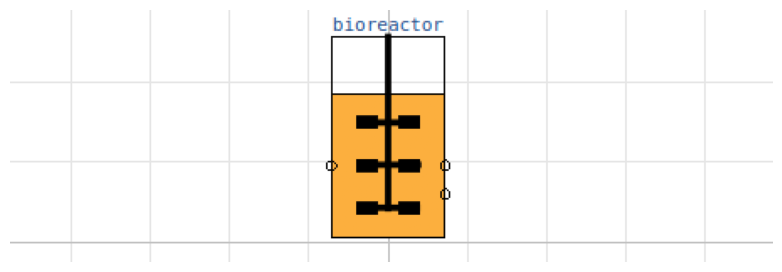

In [14]:
process_diagram()

In [15]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book model - only substrate S and cell concentration X



Could not find cannot import name 'dopri5' from 'assimulo.lib' (/usr/local/lib/python3.12/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (/usr/local/lib/python3.12/site-packages/assimulo/lib/__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (/usr/local/lib/python3.12/site-packages/assimulo/lib/__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


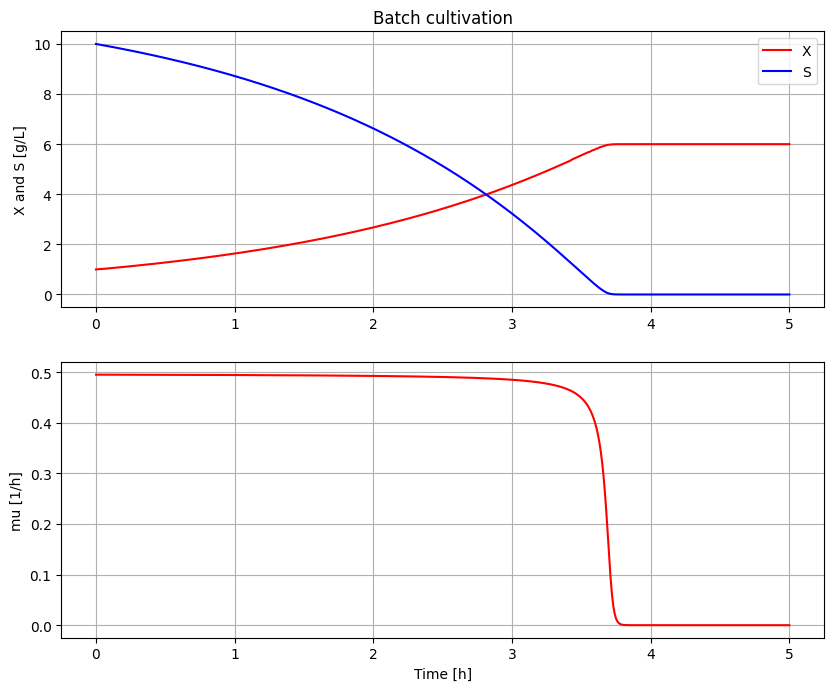

In [16]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu()

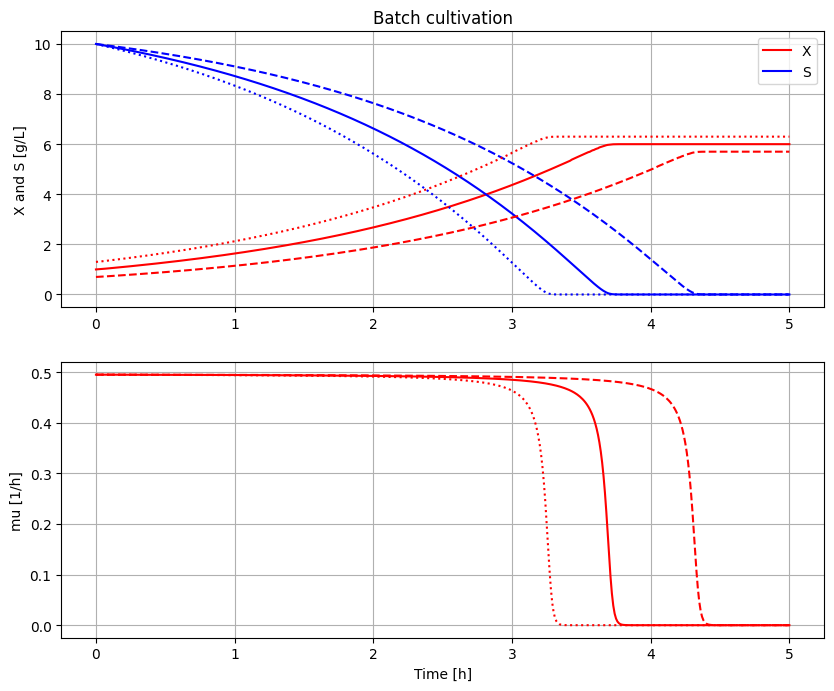

In [17]:
# Simulation were initial value of biomass VX_0 is varied
newplot(plotType='TimeSeries')
for value in [1.0, 0.7, 1.3]: init(VX_start=value); simu(5)

# Restore default value of VX_start
init(VX_start=1.0)

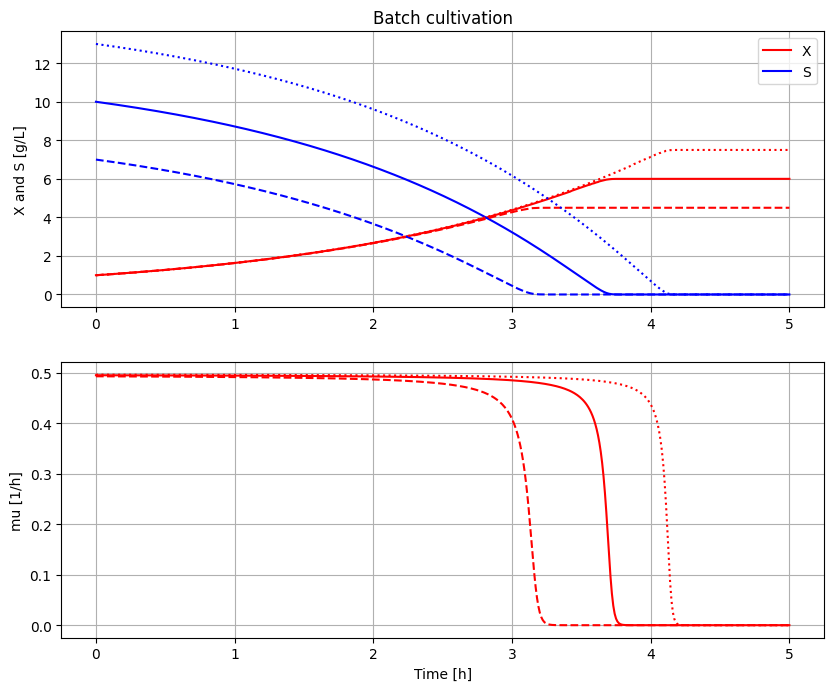

In [18]:
# Simulation were initial value of substrate VS_0 is varied
newplot(plotType='TimeSeries')
for value in [10, 7, 13]: init(VS_start=value); simu(5)

# Restore default value of VS_start
init(VS_start=10)

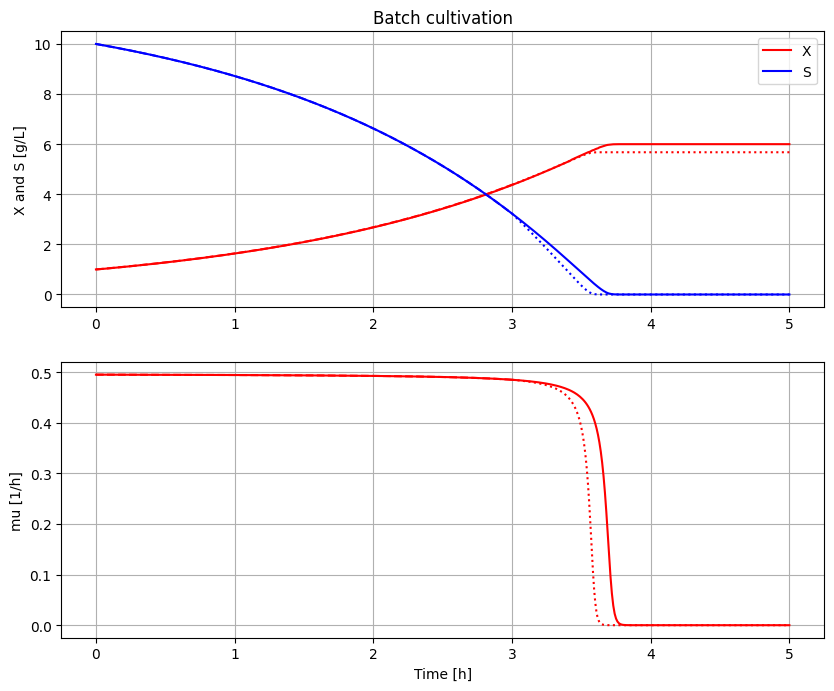

In [19]:
# Simulation where metabolism is changed after 3 hours
newplot(plotType='TimeSeries')
simu(5)

simu(3)
par(Y=0.4, qSmax=1.0/(0.4/0.5)); simu(2, 'cont')

# Restore default value of Y and qSmax
par(Y=0.5, qSmax=1.0)

In [20]:
disp('culture')

Y : 0.4
qSmax : 1.25
Ks : 0.1


In [21]:
describe('mu')

Cell specific growth rate variable : 0.0 [ 1/h ]


In [22]:
describe('parts')

['bioreactor', 'bioreactor.culture']


In [23]:
describe('MSL')

MSL: 4.1.0 - used components: none


In [24]:
system_info()


System information
 -OS: Linux
 -Python: 3.12.12
 -Scipy: not installed in the notebook
 -PyFMI: 2.18.3
 -FMU by: OpenModelica Compiler OpenModelica 1.26.0~dev-289-g6991cda
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: BPL.Examples_TEST2.Batch
 -Generated: 2025-08-30T09:59:37Z
 -MSL: 4.1.0
 -Description: Bioprocess Library version 2.3.1
 -Interaction: FMU-explore version 1.0.2
